In [1]:
import numpy as np
from matplotlib import pyplot as plt, ticker as mticker, animation as animation
from tqdm import tqdm

from fireworks.particles import Particles
import fireworks.ic as ic
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni

100%|██████████| 10000/10000 [00:01<00:00, 6711.09it/s]


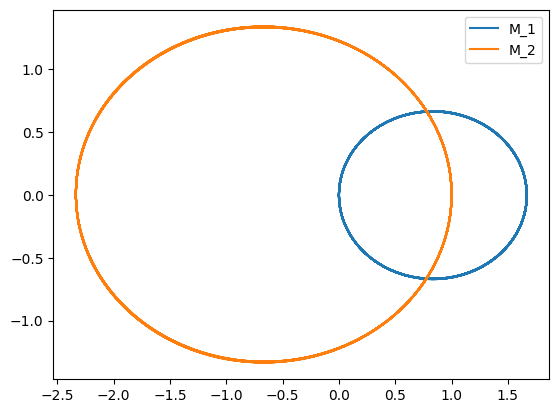

In [7]:
particles = ic.ic_two_body(mass1=8, mass2=4, e=0.6, rp=1)

pos_1 = []
pos_2 = []

tspep = 0.01
for i in tqdm(range(int(1e4))):
    pos_1.append(particles.pos[0, 0:2])
    pos_2.append(particles.pos[1, 0:2])
    particles, _, _, _, _ = fni.integrator_leapfrog(particles=particles, tstep=tspep, softening=0.0, acceleration_estimator=fnd.acceleration_direct_vectorized, args={'return_jerk': True, 'softening_type':'Plummer'})
pos_1 = np.array(pos_1).reshape((len(pos_1), 2))
pos_2 = np.array(pos_2).reshape((len(pos_2), 2))

plt.plot(pos_1[:, 0], pos_1[:, 1], label='M_1')
plt.plot(pos_2[:, 0], pos_2[:, 1], label='M_2')
plt.legend()

MovieWriter ffmpeg unavailable; using Pillow instead.


Starting Position Animation
Position Animation Saved


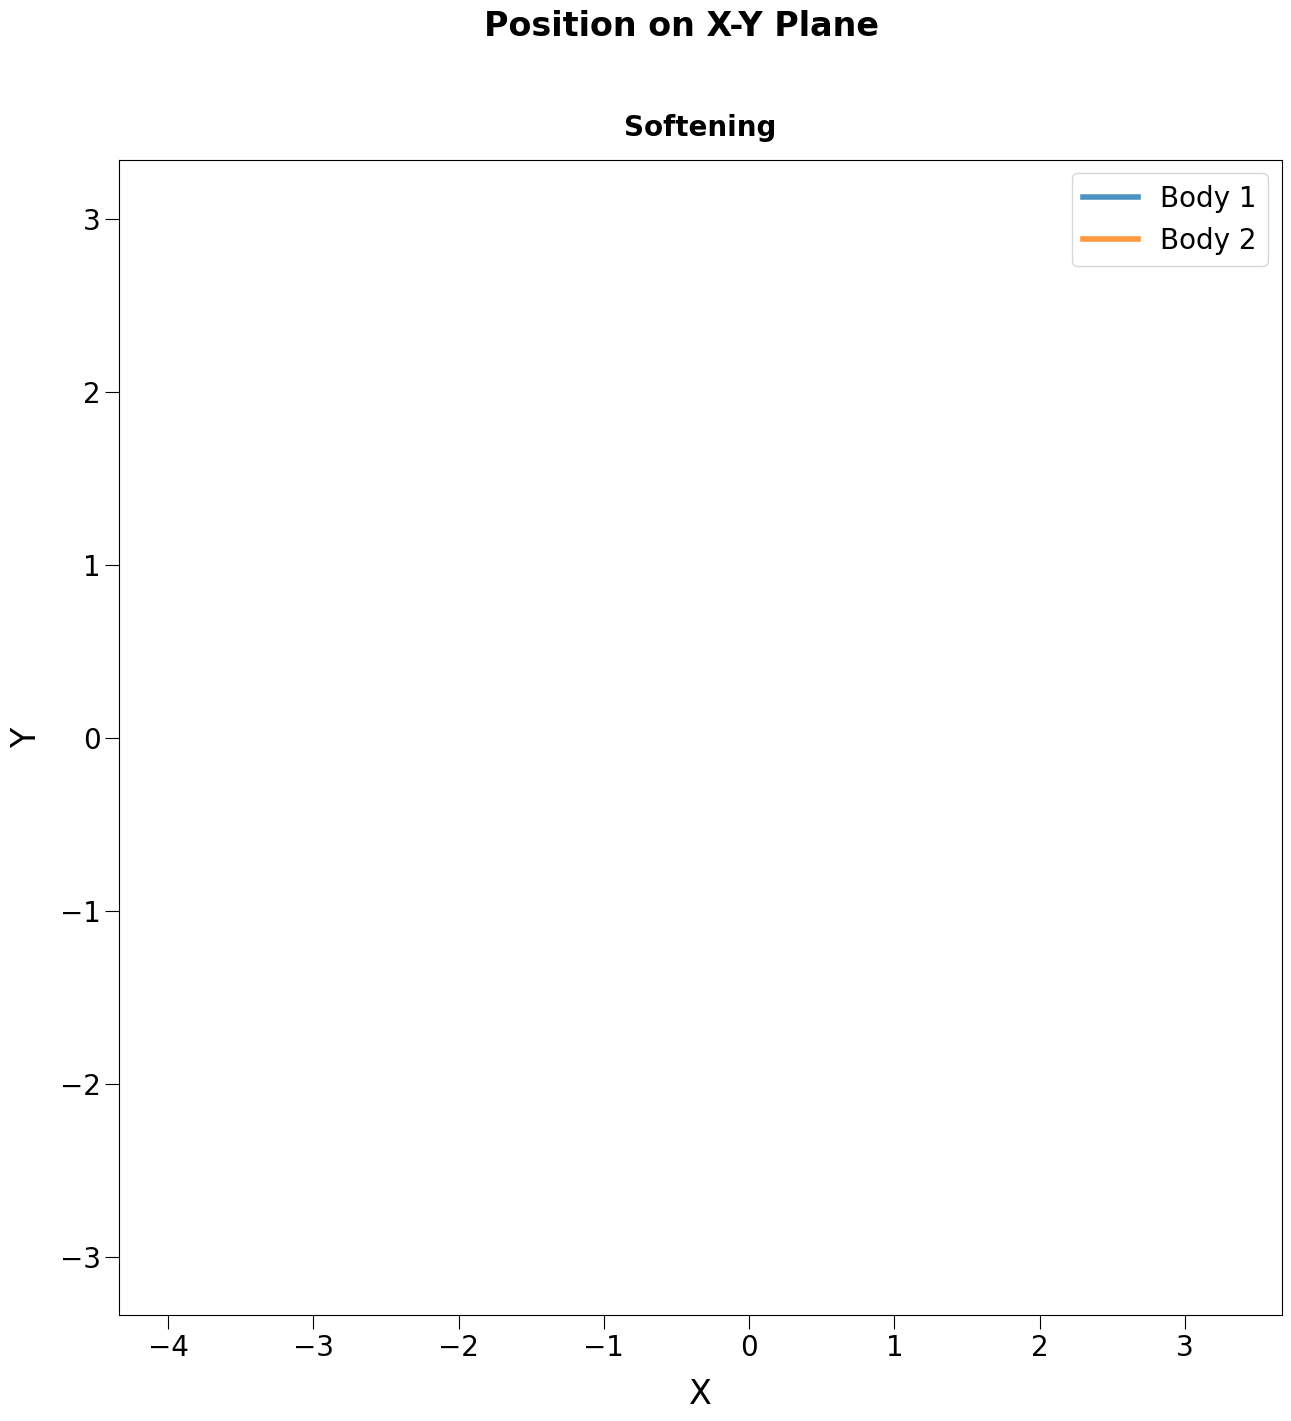

In [8]:
# downsampling
m = 10
#title
title = 'Softening'

data_pos_1 = pos_1[::m]
data_pos_2 = pos_2[::m]
lim_inf_x, lim_inf_y = np.minimum(pos_1[:, 0], pos_2[:, 0]).min(), np.minimum(pos_1[:, 1], pos_2[:, 1]).min()
lim_sup_x, lim_sup_y = np.maximum(pos_1[:, 0], pos_2[:, 0]).max(), np.maximum(pos_1[:, 1], pos_2[:, 1]).max()

fig, ax = plt.subplots(figsize=(15,15))
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '4'
plt.rcParams['axes.titlesize'] = '20'
plt.rcParams['axes.titlepad'] = '17'
plt.rcParams['axes.labelsize'] = '24'
plt.rcParams['legend.fontsize'] = '20'
plt.rcParams['axes.labelpad'] = '12'
plt.rcParams['axes.titleweight'] = '600'
plt.rcParams['axes.labelweight'] = '500'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
plt.rcParams['xtick.major.size'] = '10'
plt.rcParams['ytick.major.size'] = '10'
plt.rcParams['ytick.minor.size'] = '4'

# Calculate the number of extra frames to add at the beginning and the end
pause_duration = 0.5  # pause duration in seconds start
pause_duration_end = 1  # pause duration in seconds end
frame_rate = 15  # frame rate of the animation
extra_frames = pause_duration * frame_rate
extra_frames_end = pause_duration_end * frame_rate

# Create an array of frame indices
frames = np.concatenate([
    np.full(int(extra_frames), 0),  # initial frame (pause
    np.arange(0, len(pos_1)-1, 100),  # original frames
    np.full(int(extra_frames_end), len(pos_1)-2)  # extra frames at the end
])

def update_pos(frame): 

    ax.clear()

    # for each frame, update the data stored on each artist.
    x1 = data_pos_1[:frame, 0]
    x2 = data_pos_2[:frame, 0]
    y1 = data_pos_1[:frame, 1]
    y2 = data_pos_2[:frame, 1]


    # ax.scatter(intr[0,0, 0], intr[0,0, 1], color="tab:red", s=100, marker="x", zorder=10, label="Initial Position")
    # ax.scatter(intr[0,1, 0], intr[0,1,1], color="tab:red", s=100, marker="x", zorder=10)
    # ax.scatter(intr[0,2,0], intr[0,2,1], color="tab:red", s=100, marker="x", zorder=10)
    
    ax.plot(x1, y1, color="tab:blue", label="Body 1", alpha=0.8)
    ax.plot(x2, y2, color="tab:orange", label="Body 2", alpha=0.8)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    # ax.set_xlim(np.min(intr[:, 2])-0.5, np.max(intr[:, 2])+0.5)
    # ax.set_ylim(np.min(intr[:, 3])-0.5, np.max(intr[:, 3])+0.5)

    ax.set_xlim(lim_inf_x-2, lim_sup_x+2)
    ax.set_ylim(lim_inf_y-2, lim_sup_y+2)
    
    fig.suptitle('Position on X-Y Plane', 
                 fontsize=24, fontweight='600')
print("Starting Position Animation")

gif_pos = animation.FuncAnimation(fig=fig, func=update_pos, frames=frames, interval=10)

gif_pos.save("./two_bodies_softening_test.gif", writer="pillow")

print("Position Animation Saved")



In [13]:
def gif_sosftening_test(softening=0.0, softening_type='Plummer'):
    particles = ic.ic_two_body(mass1=8, mass2=4, e=0.6, rp=1)
    
    pos_1 = []
    pos_2 = []
    
    tspep = 0.01
    for i in tqdm(range(int(5 * 1e4))):
        pos_1.append(particles.pos[0, 0:2])
        pos_2.append(particles.pos[1, 0:2])
        particles, _, _, _, _ = fni.integrator_leapfrog(particles=particles, tstep=tspep, softening=softening, acceleration_estimator=fnd.acceleration_direct_vectorized, args={'return_jerk': True, 'softening_type':softening_type})
    pos_1 = np.array(pos_1).reshape((len(pos_1), 2))
    pos_2 = np.array(pos_2).reshape((len(pos_2), 2))
    
    plt.plot(pos_1[:, 0], pos_1[:, 1], label='M_1')
    plt.plot(pos_2[:, 0], pos_2[:, 1], label='M_2')
    plt.legend()
    
    # downsampling
    m = 10
    #title
    if softening==0.0:
        title = 'No_Softening'
    else:
        title = fr'Softening: {softening_type}, $\epsilon$: {softening}'
    
    data_pos_1 = pos_1[::m]
    data_pos_2 = pos_2[::m]
    lim_inf_x, lim_inf_y = np.minimum(pos_1[:, 0], pos_2[:, 0]).min(), np.minimum(pos_1[:, 1], pos_2[:, 1]).min()
    lim_sup_x, lim_sup_y = np.maximum(pos_1[:, 0], pos_2[:, 0]).max(), np.maximum(pos_1[:, 1], pos_2[:, 1]).max()
    
    fig, ax = plt.subplots(figsize=(15,15))
    plt.rcParams['font.size'] = '16'
    plt.rcParams['lines.linewidth'] = '4'
    plt.rcParams['axes.titlesize'] = '20'
    plt.rcParams['axes.titlepad'] = '17'
    plt.rcParams['axes.labelsize'] = '24'
    plt.rcParams['legend.fontsize'] = '20'
    plt.rcParams['axes.labelpad'] = '12'
    plt.rcParams['axes.titleweight'] = '600'
    plt.rcParams['axes.labelweight'] = '500'
    plt.rcParams['xtick.labelsize'] = '20'
    plt.rcParams['ytick.labelsize'] = '20'
    plt.rcParams['xtick.major.size'] = '10'
    plt.rcParams['ytick.major.size'] = '10'
    plt.rcParams['ytick.minor.size'] = '4'
    
    # Calculate the number of extra frames to add at the beginning and the end
    pause_duration = 0.5  # pause duration in seconds start
    pause_duration_end = 1  # pause duration in seconds end
    frame_rate = 15  # frame rate of the animation
    extra_frames = pause_duration * frame_rate
    extra_frames_end = pause_duration_end * frame_rate
    
    # Create an array of frame indices
    frames = np.concatenate([
        np.full(int(extra_frames), 0),  # initial frame (pause
        np.arange(0, len(pos_1)-1, 100),  # original frames
        np.full(int(extra_frames_end), len(pos_1)-2)  # extra frames at the end
    ])
    
    def update_pos(frame): 
    
        ax.clear()
    
        # for each frame, update the data stored on each artist.
        x1 = data_pos_1[:frame, 0]
        x2 = data_pos_2[:frame, 0]
        y1 = data_pos_1[:frame, 1]
        y2 = data_pos_2[:frame, 1]
    
    
        # ax.scatter(intr[0,0, 0], intr[0,0, 1], color="tab:red", s=100, marker="x", zorder=10, label="Initial Position")
        # ax.scatter(intr[0,1, 0], intr[0,1,1], color="tab:red", s=100, marker="x", zorder=10)
        # ax.scatter(intr[0,2,0], intr[0,2,1], color="tab:red", s=100, marker="x", zorder=10)
        
        ax.plot(x1, y1, color="tab:blue", label="Body 1", alpha=0.8)
        ax.plot(x2, y2, color="tab:orange", label="Body 2", alpha=0.8)
    
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend()
    
        # ax.set_xlim(np.min(intr[:, 2])-0.5, np.max(intr[:, 2])+0.5)
        # ax.set_ylim(np.min(intr[:, 3])-0.5, np.max(intr[:, 3])+0.5)
    
        ax.set_xlim(lim_inf_x-2, lim_sup_x+2)
        ax.set_ylim(lim_inf_y-2, lim_sup_y+2)
        
        fig.suptitle('Position on X-Y Plane', 
                     fontsize=24, fontweight='600')
    print("Starting Position Animation")
    
    gif_pos = animation.FuncAnimation(fig=fig, func=update_pos, frames=frames, interval=10)

    if softening == 0.0:
        path='./two_bodies_no_softening.gif'
    else:
        path = './two_bodies_softening_' + f'{softening_type}' + '_.gif' 
        
    gif_pos.save(path, writer="pillow")
    
    print("Position Animation Saved")
    


100%|██████████| 50000/50000 [00:07<00:00, 6747.69it/s]


Starting Position Animation
Position Animation Saved


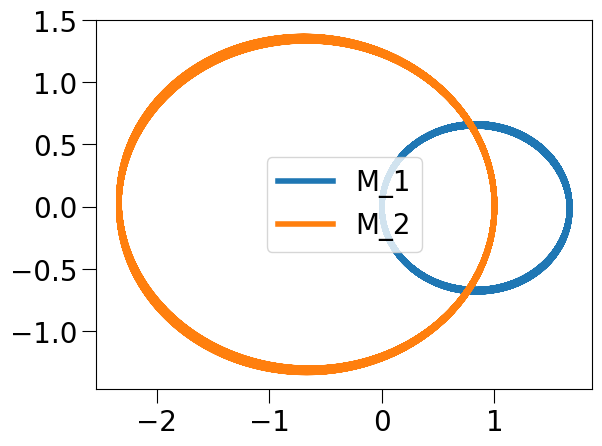

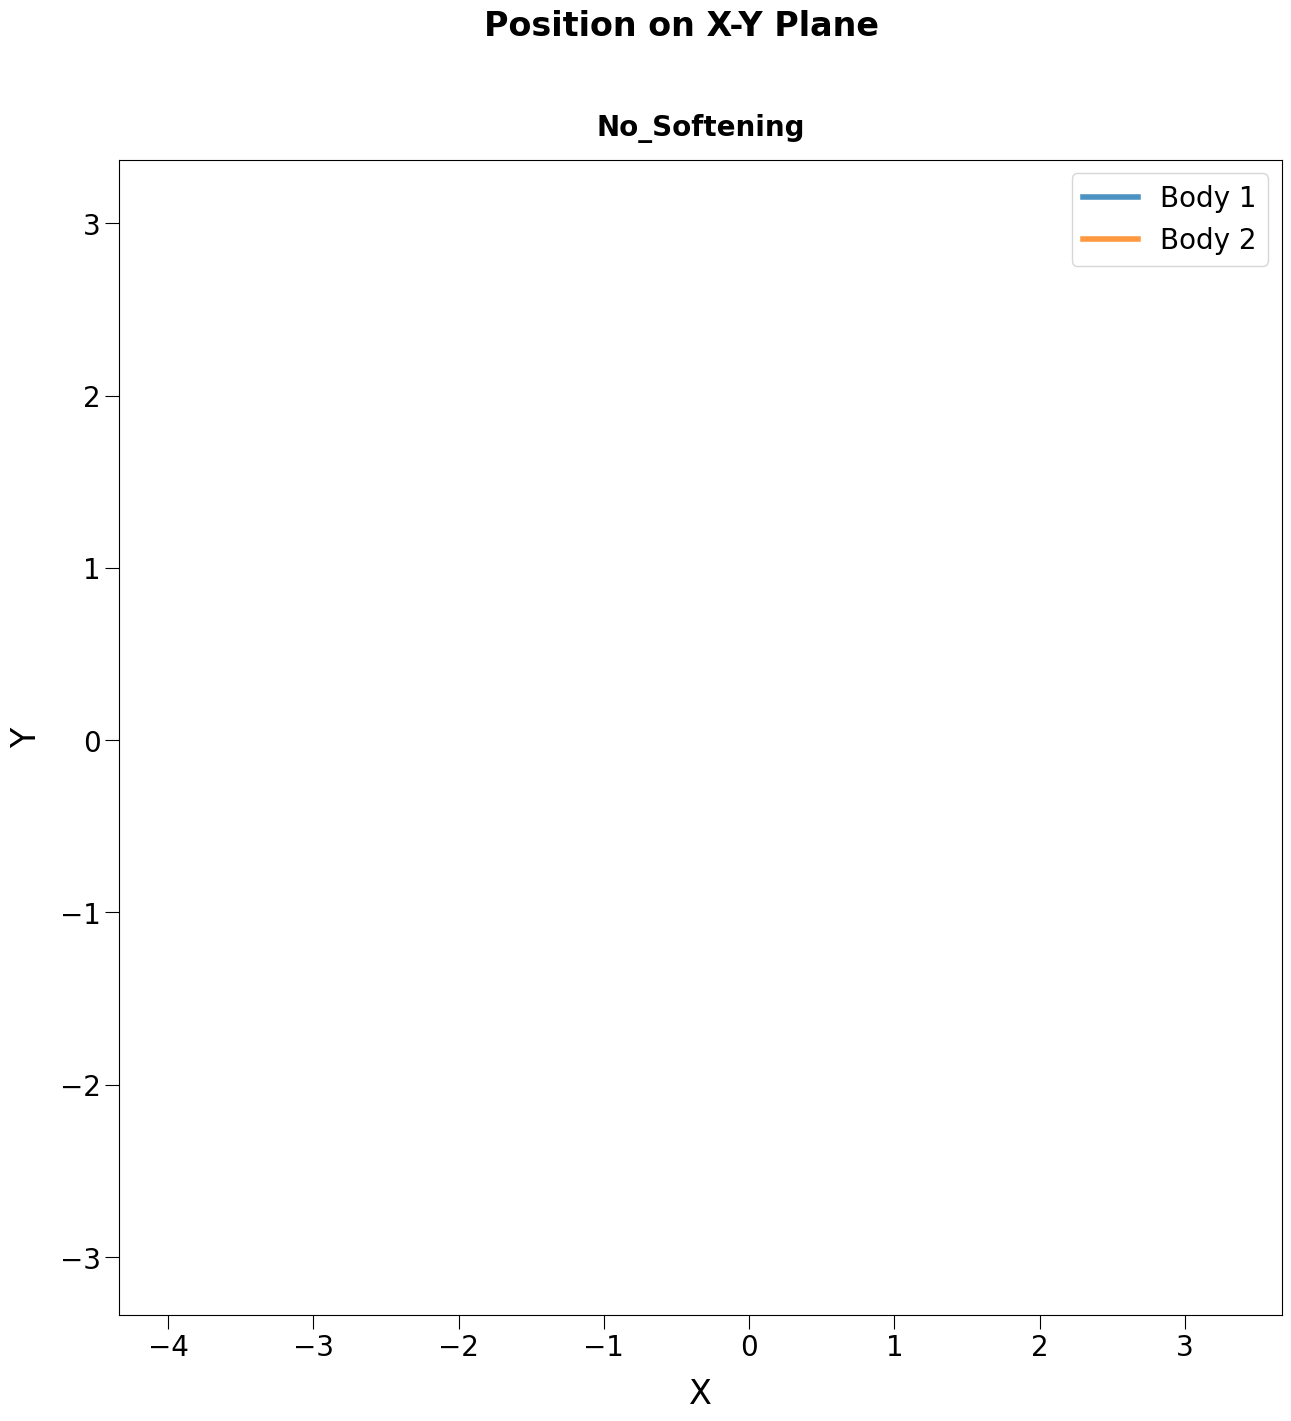

In [14]:
gif_sosftening_test(softening=0.0)

100%|██████████| 50000/50000 [00:07<00:00, 6530.36it/s]


Starting Position Animation
Position Animation Saved


100%|██████████| 50000/50000 [00:12<00:00, 4149.44it/s]


Starting Position Animation
Position Animation Saved


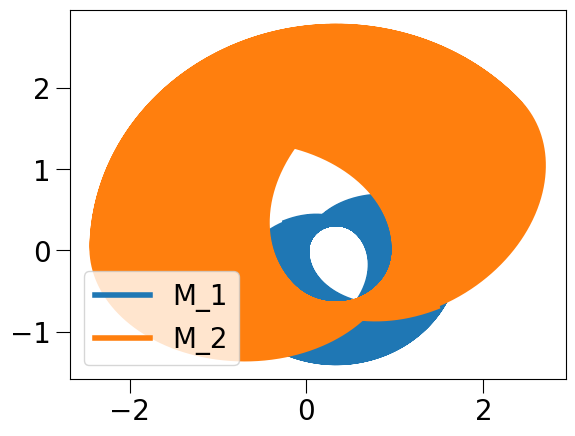

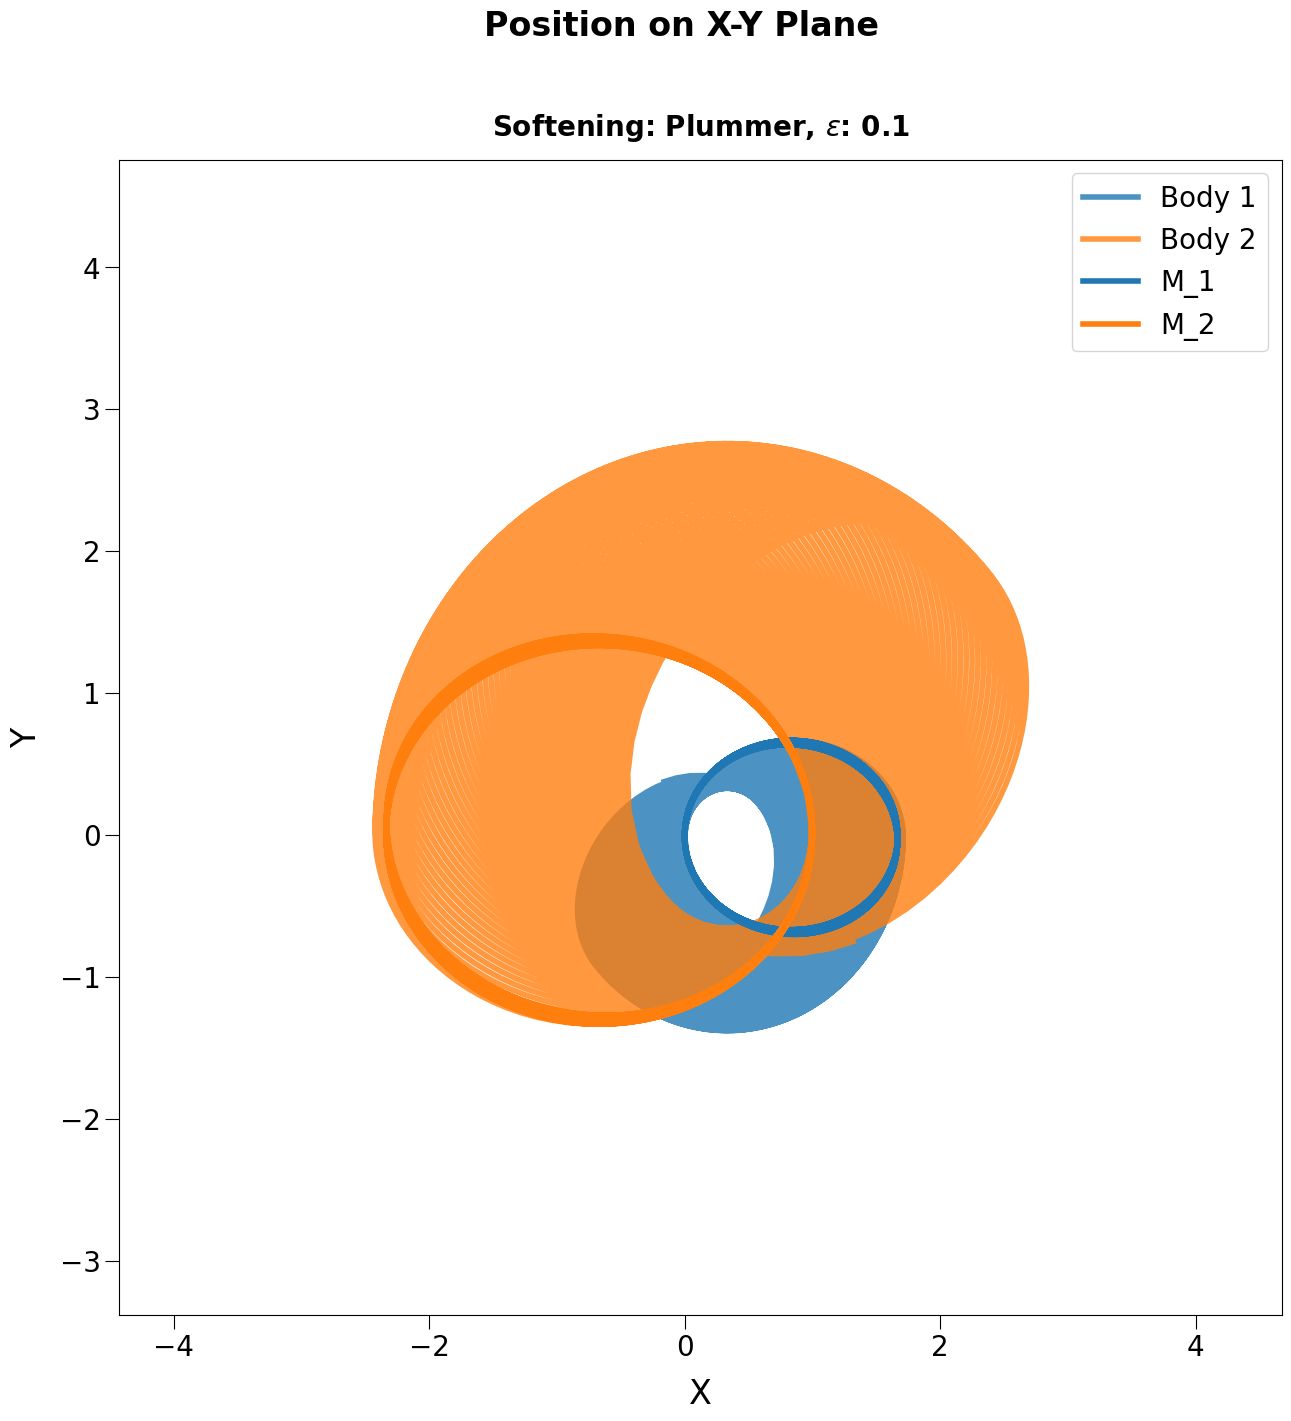

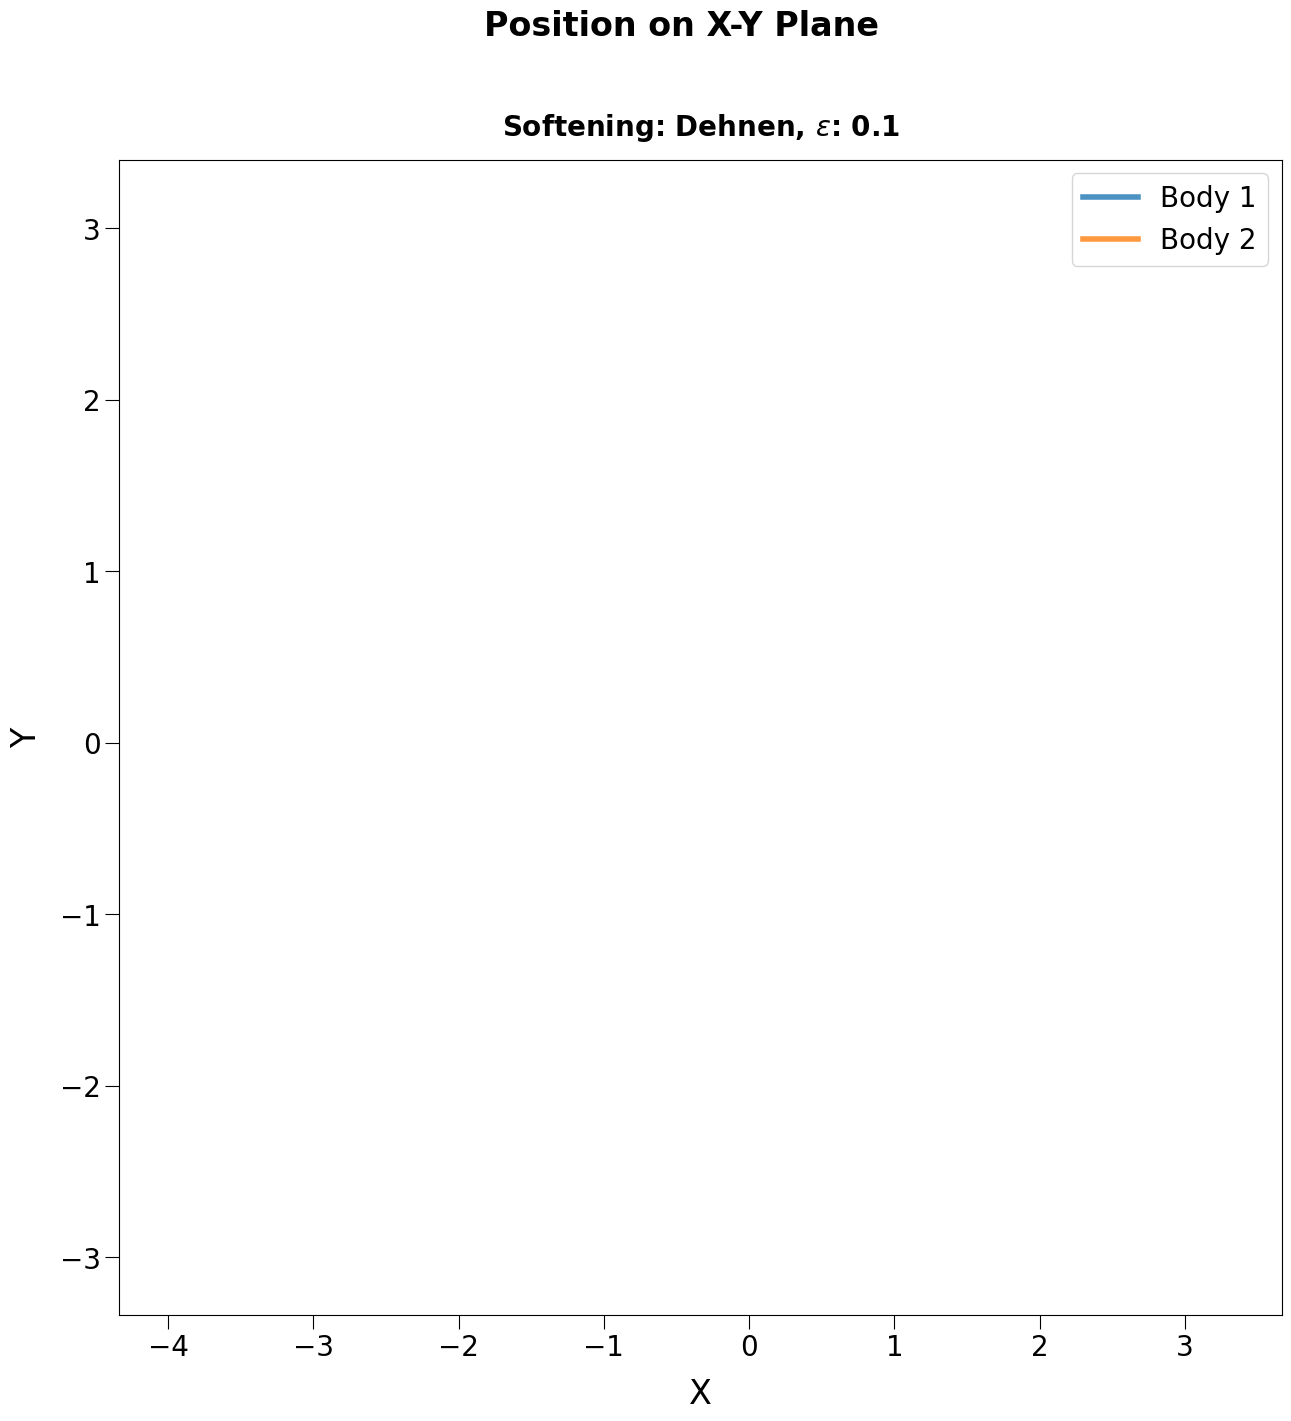

In [16]:
softening = 0.1
for i in ('Plummer', 'Dehnen'):
    gif_sosftening_test(softening=softening, softening_type=i)